# Regularization

#### Regularization as a way to do feature selection
In this part, we illustrate the concept of regularization as seen during the lecture

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn import linear_model
import math
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

np.random.seed(5)

In [2]:
data_folder = '/home/lasdonnas/data/malis/'

In [3]:
#1- Data loading - We use the prostate cancer data set from The Elements of Statistical learning
ds= pd.read_csv(data_folder + 'prostate.csv')
ds.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


In [4]:
#Following the procedure from the book, we use the same training/testing datasets as they do
ds_train = ds[ds['train'] == True]
ds_test = ds[ds['train'] == False]

In [5]:
#Split data (X) from targets (y)
x_train = ds_train.iloc[:,[0,1,2,3,4,5,6,7]]
y_train = ds_train['lcavol']

In [6]:
from numpy.linalg import inv
from numpy import linalg

def ridge_regression(X,y, lambda_val):
    '''Naive implementation of ridge regression that illustrated the introduction of the regularization term'''
    X_t = np.transpose(X) #X^T
    X_t_X = X_t.dot(X)    #X^TX
    
    reg_term = lambda_val*np.identity(len(X_t_X))    

    X_inv = inv(X_t_X + reg_term)    #(#X^TX + lambda*I)^-1
    X_T_y = X_t.dot(y)    #X^Ty
    w = linalg.solve(X_t_X + reg_term, X_T_y)
    return w

Recall that the regularization acts over all the model parameters except for $w_0$. In order to do matrix operations (rather than element-wise sums), there are two possible tricks:

1. Manually set to zero the first element of the identity matrix
2. (Better) Centering and normalizing the data so that the effect of the intercept (or bias) is not so relevant.

Below we use option 2.

In [7]:
y_train_norm = y_train - y_train.mean()

norm = (np.square(x_train)).sum(axis=0)
x_train_norm = (x_train - x_train.mean())/np.sqrt(norm)

poly = PolynomialFeatures(1)  
x_train_norm = poly.fit_transform(x_train_norm)

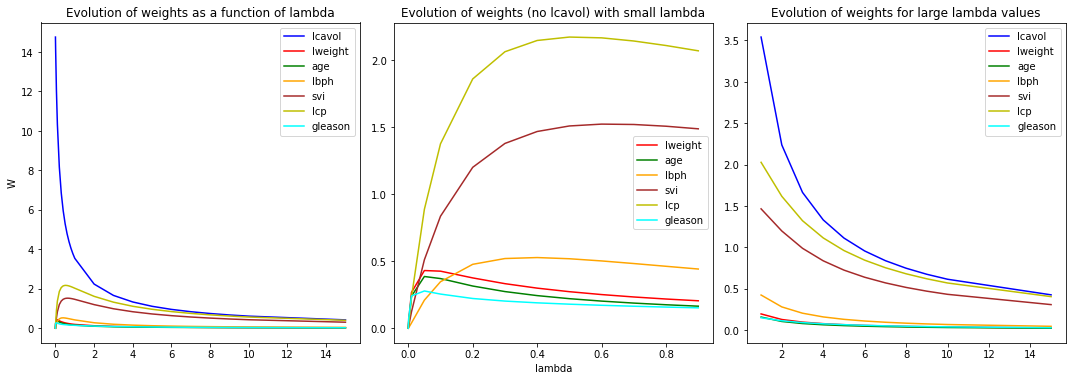

In [8]:
lambda_range=[0.00, 0.0001,0.0005, 0.001, 0.01, 0.05, 0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,2,3,4,5,6,7,8,9,10,15] 

results = np.ndarray(shape=(len(lambda_range),8), dtype=float)
df = np.ndarray(shape=(len(lambda_range),1), dtype=float)
counter = 0
for a_lambda in lambda_range:
    w_hat= ridge_regression(x_train_norm, y_train_norm, a_lambda)
    results[counter,:] =  w_hat[1:]    
    #print(w_hat)
    counter +=1
       
plt.rcParams['figure.figsize'] = [15, 10]
colors=['b','r', 'g', 'orange', 'brown', 'y', 'cyan']
plt.subplot(231) 
for feat in range(0,7):
    plt.tight_layout()
    plt.plot(lambda_range,results[:,feat],  color=colors[feat], label=x_train.columns.values[feat])
    plt.legend()
plt.ylabel('W')
plt.title('Evolution of weights as a function of lambda')

plt.subplot(232) 
part_1=15
for feat in range(1,7):
    plt.tight_layout()
    plt.plot(lambda_range[:part_1],results[:part_1,feat],  color=colors[feat], label=x_train.columns.values[feat])
    plt.legend()
plt.title('Evolution of weights (no lcavol) with small lambda')
plt.xlabel('lambda')
plt.subplot(233) 
for feat in range(0,7):
    plt.tight_layout()
    plt.plot(lambda_range[part_1:],results[part_1:,feat],  color=colors[feat], label=x_train.columns.values[feat])
    plt.legend()
plt.title('Evolution of weights for large lambda values')

plt.show()

#### Regularization and polynomial features
Let us revisit the Men's Olympic 100m dataset to see how we can use regularization as a way to control the order of polynomial features.

alpha: 0 gives W: [-6.23269427e-09 -8.13638626e+04 -1.23154391e+06  3.99864925e+06
 -2.10982203e+06 -4.13071960e+06  5.24217644e+06 -1.68737681e+06]
alpha: 1e-05 gives W: [ 4.50905945e-16 -4.11498118e+01 -8.99905545e-01  2.32795512e+01
  3.15181252e+01  2.39574392e+01  7.50942192e-01 -3.79363466e+01]
alpha: 0.002 gives W: [-4.66498851e-16 -1.73507591e+00 -9.97927927e-01 -3.69725207e-01
  1.50016308e-01  5.61866710e-01  8.66481144e-01  1.06459864e+00]
alpha: 0.05 gives W: [-4.51061544e-16 -7.79251911e-01 -5.34277344e-01 -2.93511369e-01
 -5.70108294e-02  1.75170822e-01  4.02983604e-01  6.26381070e-01]
alpha: 0.1 gives W: [-4.43138216e-16 -5.33876150e-01 -3.74265676e-01 -2.16731203e-01
 -6.13142840e-02  9.19452170e-02  2.43009178e-01  3.91841276e-01]
alpha: 1 gives W: [-4.16716051e-16 -1.30621767e-01 -1.08510109e-01 -8.65980794e-02
 -6.48920071e-02 -4.33980570e-02 -2.21222209e-02 -1.07030941e-03]


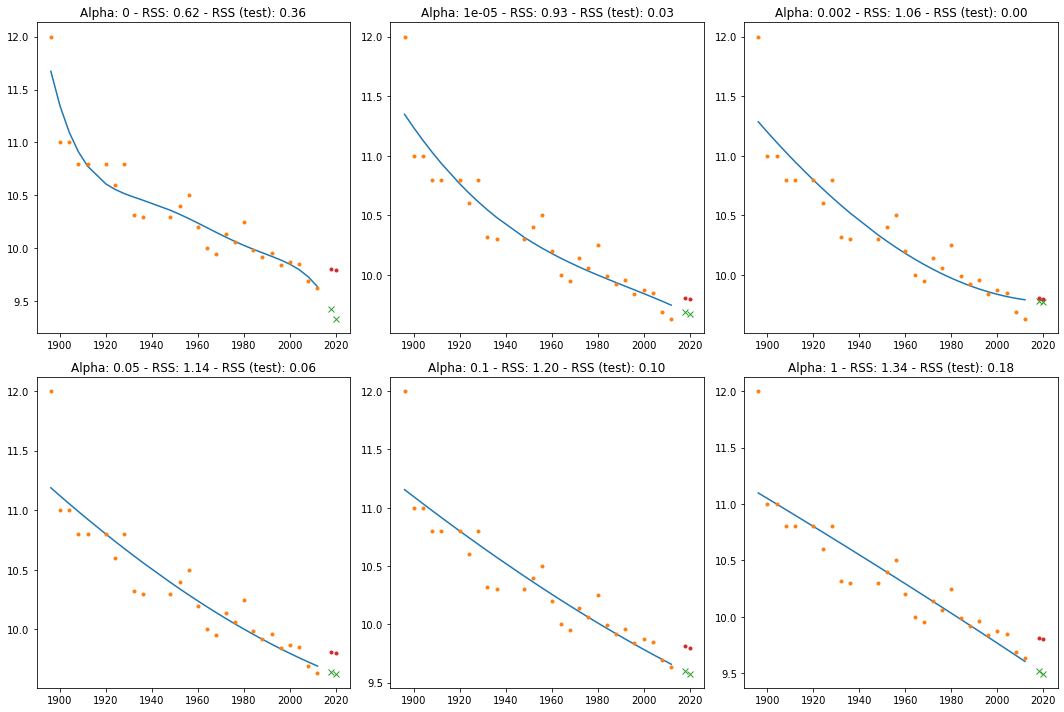

In [9]:
ds = pd.read_csv(data_folder + 'olympics_100m.csv', sep=',')

#Splitting traing/test
training = ds[0:len(ds)-2]
testing=ds[-2:]

#Let's use the notation from the lecture
X = training.loc[:,'Year'].values
y = training.loc[:, 'Time'].values
X = X.reshape(len(training),1)

X_test = testing.loc[:,'Year'].values
y_test = testing.loc[:, 'Time'].values
X_test = X_test.reshape(len(testing),1)

power = 7
poly = PolynomialFeatures(power)
X_train = poly.fit_transform(X)

scaler = StandardScaler(copy=True)
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])

X_test_poly =  poly.fit_transform(X_test)
scaled_test = X_test_poly
X_test_poly[:,1:] = scaler.transform(X_test_poly[:,1:])

plt.rcParams['figure.figsize'] = [15, 10]
alphas = [0, 0.00001, 0.002, 0.05, 0.1, 1]
for count, degree in enumerate(alphas):
    w = ridge_regression(X_train,y-y.mean(),degree)
#     X_plot = poly.fit_transform(x_plot.reshape(-1,1))
    y_hat = np.sum(X_train*w,axis=1)+y.mean()
    print('alpha: '+ str(degree) + ' gives W: ' + str(w))
    plt.subplot(231+count) #Non-elegant way to assign spaces in the subplot
    plt.tight_layout()
    plt.plot(np.transpose(X[:,0]),y_hat)
    plt.plot(X[:,0],y,'.')
    y_hat_test = np.sum(X_test_poly*w,axis=1)+y.mean()
       
    plt.plot(X_test[:,0],y_hat_test,'x')
    plt.plot(X_test[:,0],y_test,'.')
     
    plt.title('Alpha: ' + str(degree) + ' - RSS: ' + '{:.2f}'.format((sum((y - y_hat)*(y - y_hat))))
              + ' - RSS (test): ' + '{:.2f}'.format(sum((y_test - y_hat_test)*(y_test - y_hat_test))))